<h2>Titanic EDA and Cleaning</h2>
<h3>By Arthur & Asir</h3>

##### In this notebook, you can find all the **data exploration** and **cleaning** we did on the **titanic** dataset.

<h3>1.1 The titanic dataset</h3>

##### First of all, we install all the neccesary libraries in our virtual environment.

In [58]:
%pip install pandas
%pip install matplotlib
%pip install numpy
%pip install scikit-learn
%pip install xlrd
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [60]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns

##### Now, we will import our csv dataset and print the first 10 lines to make sure it is loaded correctly.

In [61]:
titanic_data = pd.read_excel("../3. Other/Datasets/Titanic/Titanic.xls")
titanic_data.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


##### Let's see the statistics of our dataset. 

In [62]:
titanic_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


##### Now, let's see the data types of our dataset.

In [63]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


##### Let's change the names of the columns now to make them more clear.

In [64]:
titanic_data.columns = ["passenger_class","survived","name","sex","age","number_of_siblings","number_of_parents","ticket","fare","cabin","embarked","boat","body","destination"]

##### Now let's create a pie chart that displays how  many males and females there were on the titanic.

([<matplotlib.patches.Wedge at 0x224dbb21330>,
 [Text(0.5245493070962803, 1.0792812536242868, 'female'),
  Text(-0.4808369574670582, -0.9893411041363958, 'male')],
 [Text(0.3059870958061635, 0.629580731280834, '35.6%'),
  Text(-0.2622747040729408, -0.5396406022562158, '64.4%')])

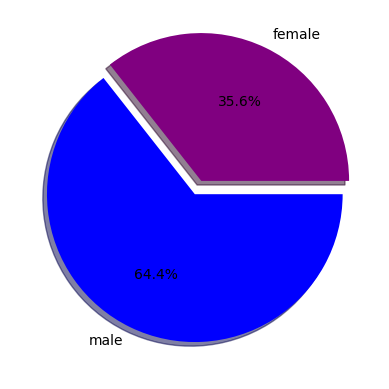

In [65]:
# piechart with matplotlib

genders = titanic_data["sex"]

female = []
male = []

for gender in genders:
    if gender == "male":
        male.append(gender)
    else:
        female.append(gender)
labels = ["female","male"]
count_female = np.array(len(female))
count_male = np.array(len(male))
plot_size = [count_female,count_male]
explode = (0.1,0)
fig,ax = plt.subplots()
ax.pie(plot_size,labels=labels, explode = explode, autopct='%1.1f%%',colors=["purple","blue"],shadow=True)

In [66]:
# piechart with plotly

fig_MaleFemale = px.pie(
    titanic_data, 
    names='sex', 
    color_discrete_sequence=['blue', 'purple'],
    width=500)

fig_MaleFemale.update_traces(pull=[0.1, 0])

fig_MaleFemale.show()

##### Now let's create a histogram that displays from which city the passengers had embarked.

In [67]:
# count plot with plotly
fig = px.histogram(
    titanic_data, 
    x='embarked', 
    color='embarked',
    width=500)

# added title and changed axis names
fig.update_xaxes(
    title_text="Port of Embarkation",
    tickvals=[0,1,2], 
    ticktext=["Southampton", "Cherbourg","Queenstown"])

fig.show()

##### Now let's create a histogram that displays how many has survived or not on the titanic.

In [68]:
# count plot with plotly
fig = px.histogram(
    titanic_data, 
    x='survived', 
    color='survived',
    color_discrete_map={0:'maroon', 1:'green'},
    width=500)

# removed showing -0.5, 0.5, 1.5 on x axis with tickvals, added title and changed axis names
fig.update_xaxes(
    title_text="Did they survive?",
    tickvals=[0, 1], 
    ticktext=["No", "Yes"])

fig.show()


##### Now, let's see the relationship between passenger class and survival in a point plot

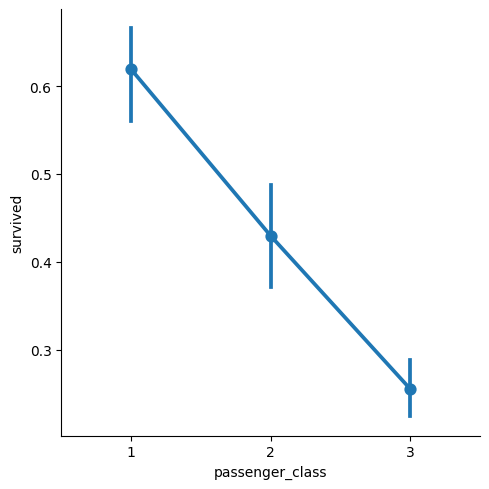

In [69]:
# point plot with seaborn

sns.catplot(
    x='passenger_class', 
    y='survived', 
    data=titanic_data, 
    kind='point')

##### Now, let's see the relationship between passengar class, sex and age in a boxplot.

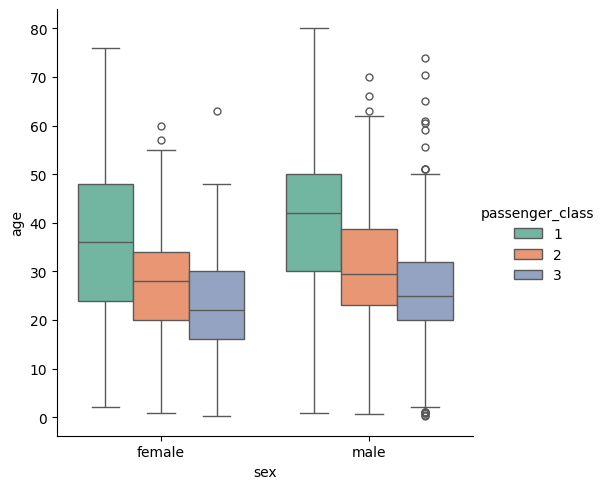

In [70]:
# box plot with seaborn

sns.catplot(
    x='sex', 
    y='age', 
    data=titanic_data, 
    kind='box', 
    hue='passenger_class',
    palette='Set2')


First, let's notice at the 25th percentile, median and 50th percentile. The chart indicates that the older people people bought the first class ticket and the young people travelled in second and third class.

##### Now, let's construct a correlation matrix.

In [71]:
# Computing the correlation matrix
corr_matrix = titanic_data.corr(numeric_only=True)

# heatmap with plotly
fig = px.imshow(
    corr_matrix, 
    color_continuous_scale='Purples', 
    labels=dict(color='Correlation'))
fig.show()

It is obvious that **Passenger class** and **Fare** has a negative correlation. But, we can also notice there is negative correlation between **Passenger class** and **Age**, **Passenger class** and **Survived**. There is a positve coorelation between **Fare** and **Survived**.

##### Now, let's change the male and female to numbers so we can easily use them in our models.

In [ ]:
filter_female = (titanic_data["sex"] == "female")
titanic_data.loc[filter_female,"sex"] = 0
filter_male = (titanic_data["sex"] == "male")
titanic_data.loc[filter_male,"sex"] = 1

##### Now, let's round up the ages and remove the decimals.

In [ ]:
titanic_data_round_up_ge  = (titanic_data["age"] > 0)
titanic_data.loc[titanic_data_round_up_ge,"age"] = round(titanic_data["age"])
# All null values replaced with the number 0
titanic_data.fillna(0,inplace=True)
titanic_data.tail(10)

#### Let's export our cleaned dataset to a new csv file now.

In [ ]:
titanic_data.to_csv('../3. Other/Datasets/Titanic/Titanic cleaned.csv')